# Cho dữ liệu nba_2013.csv
## Sử dụng thuật toán Linear để dự đoán số điểm (points) mà các cầu thủ NBA ghi được trong mùa giải 2013-2014.

Mỗi hàng trong dữ liệu chứa thông tin về player thực hiện trong mùa giải 2013-2014 NBA. 
* player -- tên player
* pos -- vị trí của player
* g -- số trận mà player đã tham gia
* gs -- số trận mà player đã bắt đầu
* pts -- tổng số point mà player đã ghi được

### 1. Đọc dữ liệu và gán cho biến data. Xem thông tin data: shape, type, head(), tail(), info. Tiền xử lý dữ liệu (nếu cần).
### 2. Tạo inputs data với các cột không có giá trị null trừ cột 'player', 'bref_team_id', 'season', 'season_end', 'pts', và outputs data với 1 cột là 'pts'.
### 3. Từ inputs data và outputs data => Tạo X_train, X_test, y_train, y_test với tỷ lệ 80:20
### 4. Thực hiện Linear với X_train, y_train
### 5. Dự đoán y từ X_test => so sánh với y_test
### 6. Xem kết quả => Nhận xét model
### 7. Lưu model nếu model có kết quả tốt.
### 8. Áp dụng Pipeline cho bài toán trên.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
import re
warnings.filterwarnings('ignore')

In [99]:
nba = pd.read_csv('data8/Ex2_NBA_Players/nba_2013.csv')
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [100]:
nba.shape

(481, 31)

In [101]:
type(nba)

pandas.core.frame.DataFrame

In [102]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [103]:
nba.tail()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013
480,Tyler Zeller,C,24,CLE,70,9,1049,156,290,0.538,...,179,282,36,18,38,60,137,399,2013-2014,2013


In [104]:
inputs = nba.drop(['player', 'bref_team_id', 'season', 'season_end', 'pts'], axis=1)
for col in inputs.columns:
    if (inputs[col].isnull().sum() != 0): inputs[col] = inputs[col].fillna(inputs[col].median())
    else: continue

inputs

,pos,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,SF,23,63,0,847,66,141,0.468,4,15,...,53,0.660,72,144,216,28,23,26,30,122
1,C,20,81,20,1197,93,185,0.503,0,0,...,136,0.581,142,190,332,43,40,57,71,203
2,PF,27,53,12,961,143,275,0.520,0,0,...,119,0.639,102,204,306,38,24,36,39,108
3,SG,28,73,73,2552,464,1011,0.459,128,300,...,336,0.815,32,230,262,248,35,3,146,136
4,C,25,56,30,951,136,249,0.546,0,1,...,67,0.836,94,183,277,40,23,46,63,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,SG,20,72,16,1765,345,808,0.427,40,188,...,326,0.641,69,159,228,217,78,16,204,151
477,SG,28,64,9,1810,387,889,0.435,135,350,...,285,0.825,29,137,166,95,46,12,95,156
478,PF,25,79,78,2718,582,1283,0.454,90,292,...,229,0.712,166,310,476,182,167,36,165,213
479,C,21,82,3,1416,172,404,0.426,0,1,...,200,0.730,118,235,353,92,40,41,87,170


In [105]:
output = nba['pts']
output

0       171
1       265
2       362
3      1330
4       328
       ... 
476     939
477    1144
478    1417
479     490
480     399
Name: pts, Length: 481, dtype: int64

-------------------------- age --------------------------------


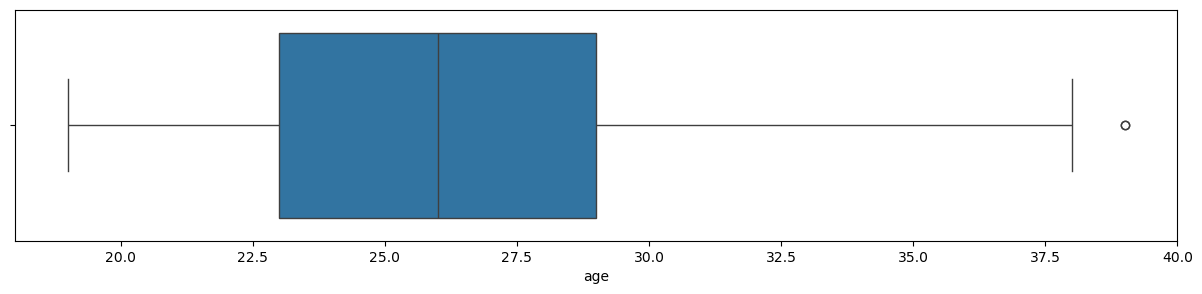


-------------------------- g --------------------------------


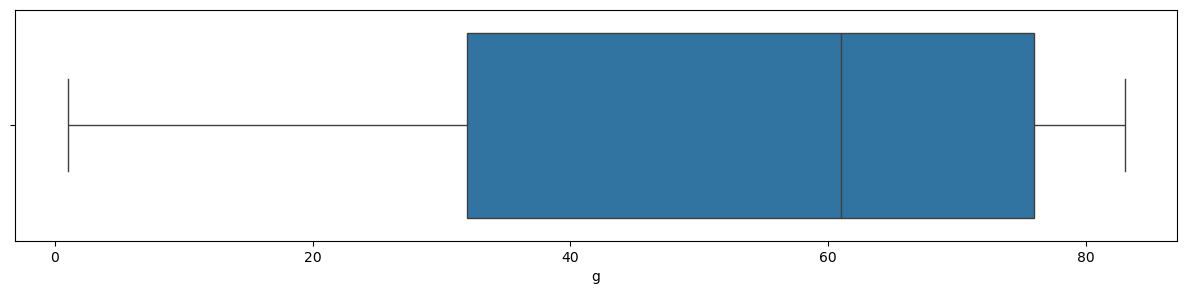


-------------------------- gs --------------------------------


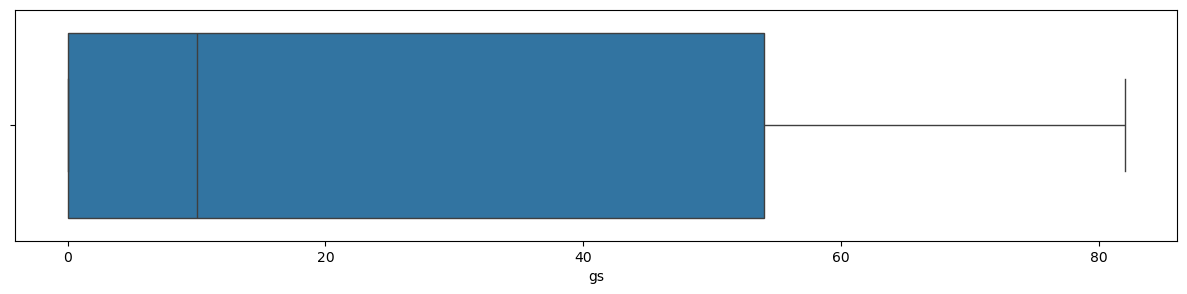


-------------------------- mp --------------------------------


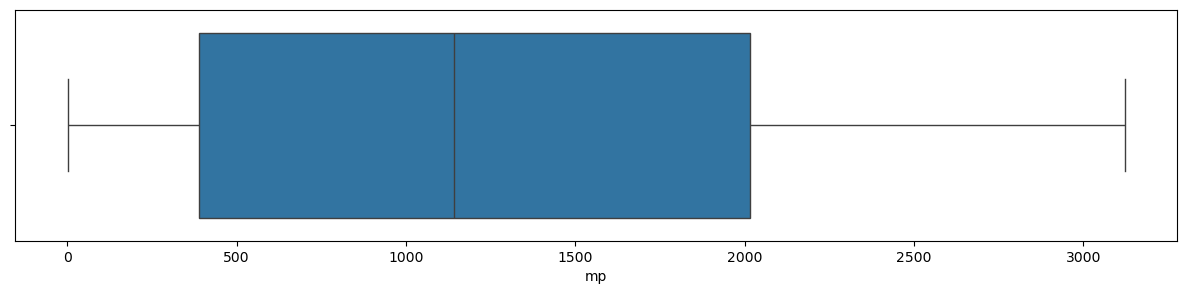


-------------------------- fg --------------------------------


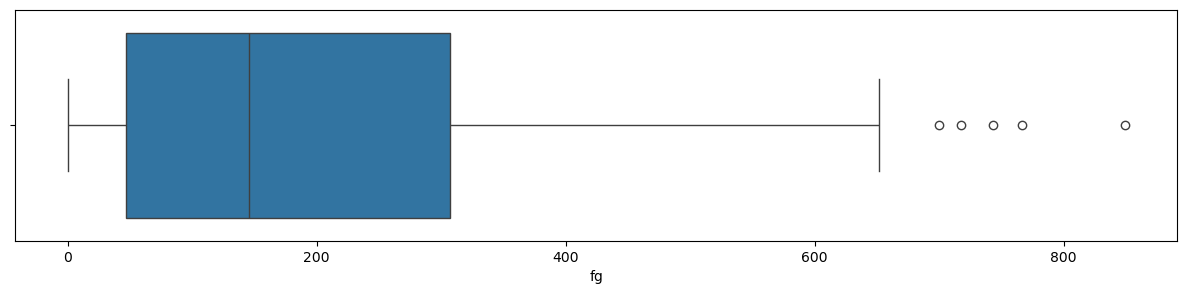


-------------------------- fga --------------------------------


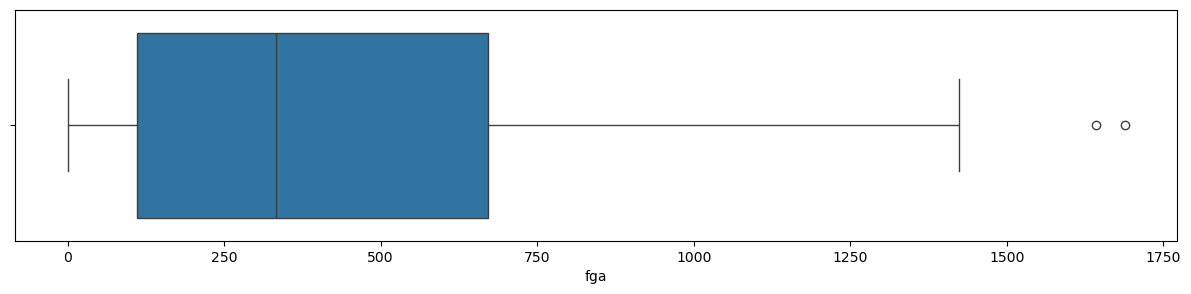


-------------------------- fg. --------------------------------


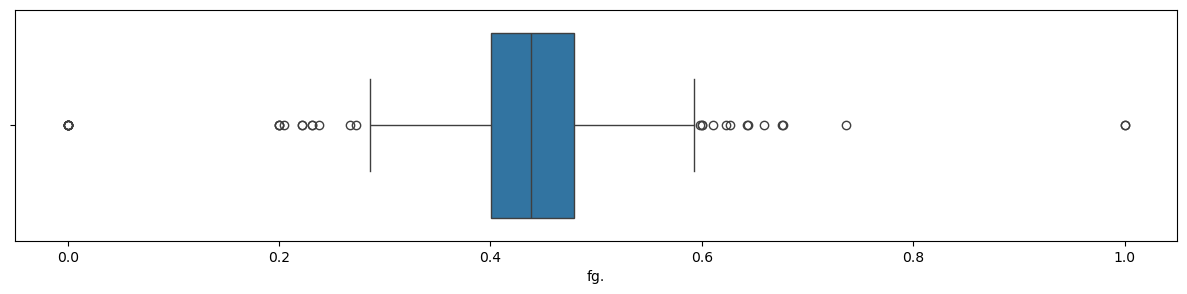


-------------------------- x3p --------------------------------


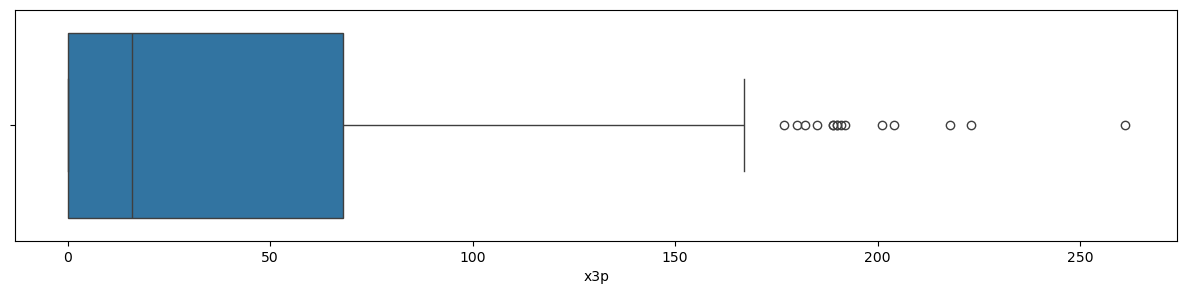


-------------------------- x3pa --------------------------------


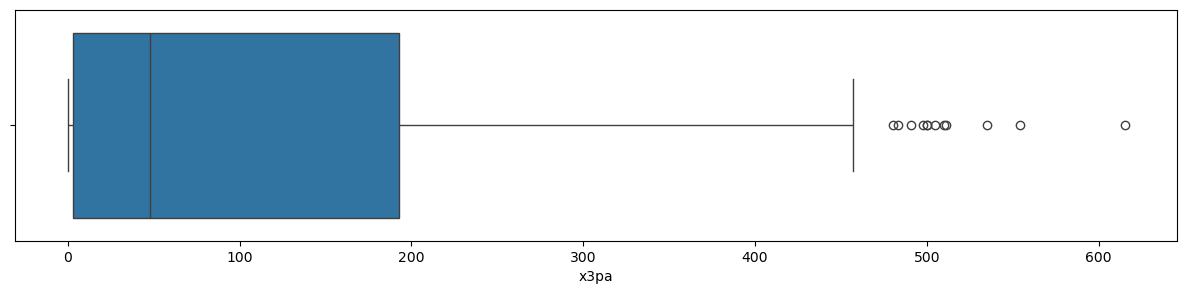


-------------------------- x3p. --------------------------------


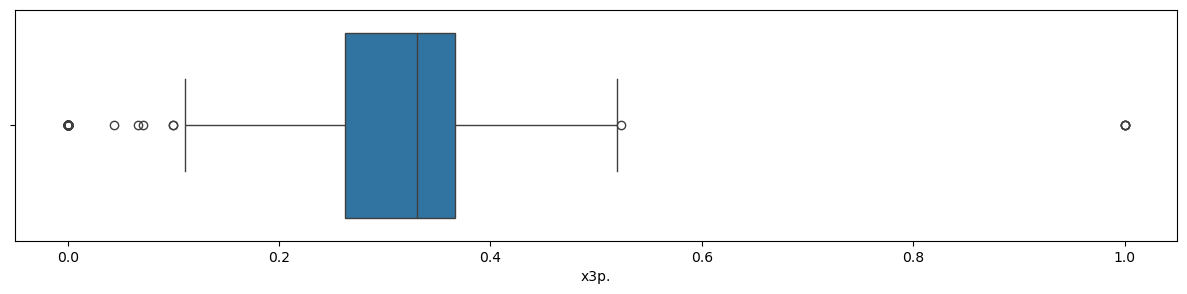


-------------------------- x2p --------------------------------


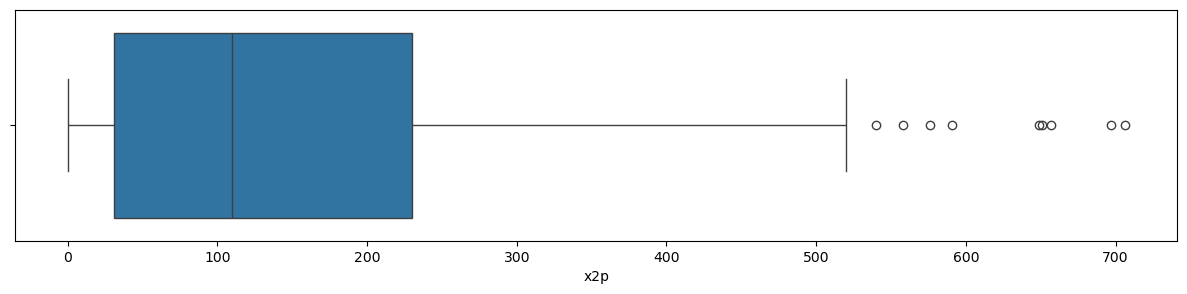


-------------------------- x2pa --------------------------------


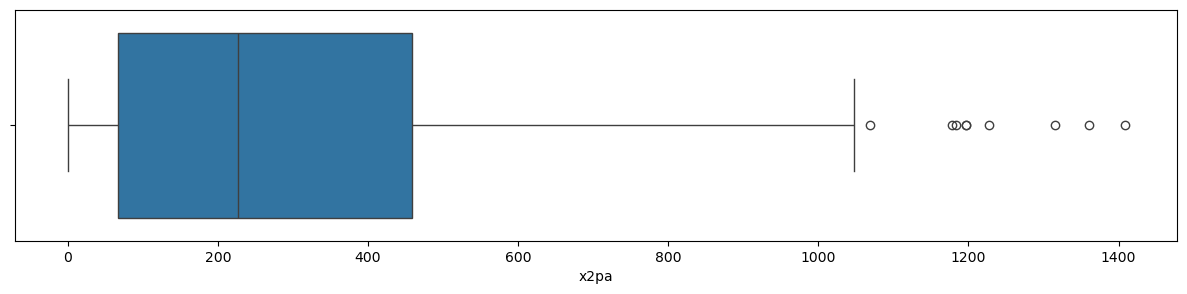


-------------------------- x2p. --------------------------------


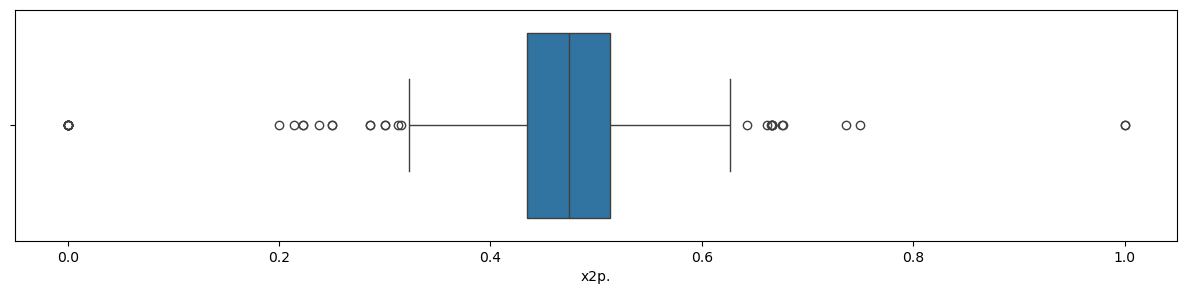


-------------------------- efg. --------------------------------


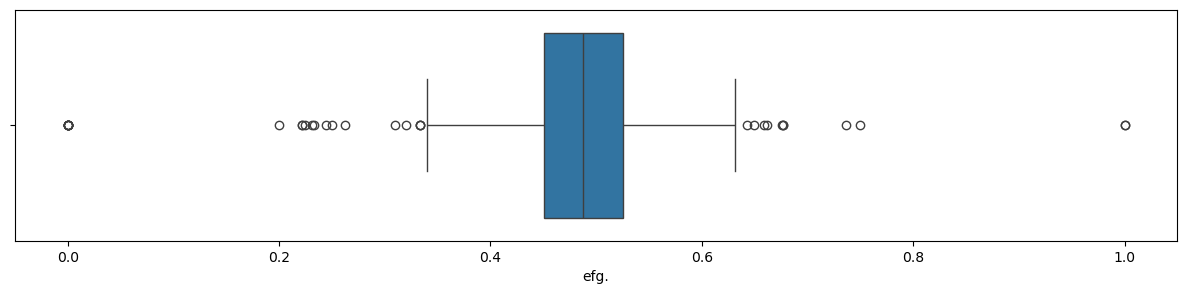


-------------------------- ft --------------------------------


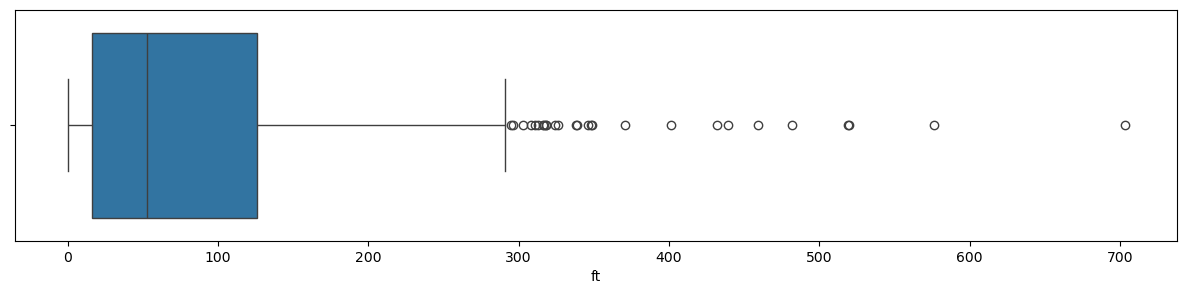


-------------------------- fta --------------------------------


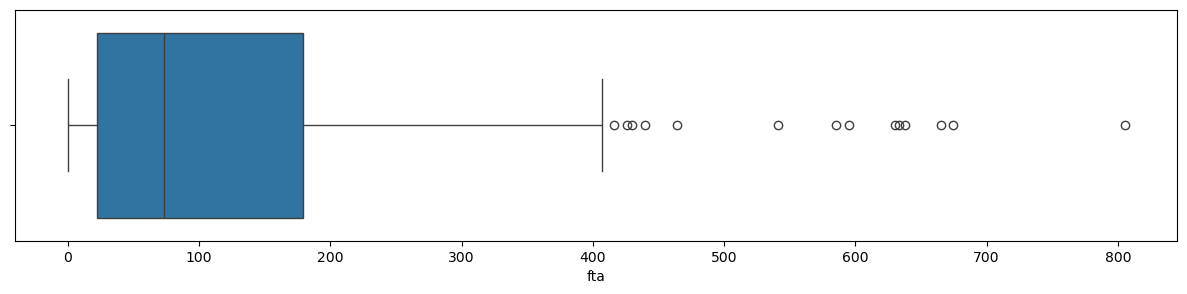


-------------------------- ft. --------------------------------


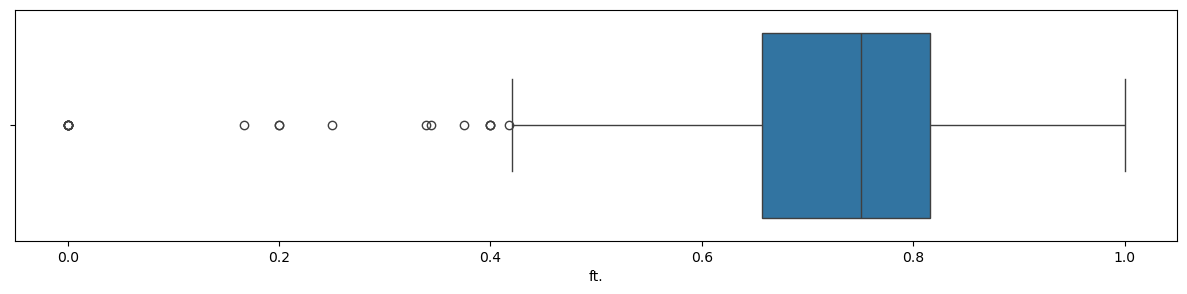


-------------------------- orb --------------------------------


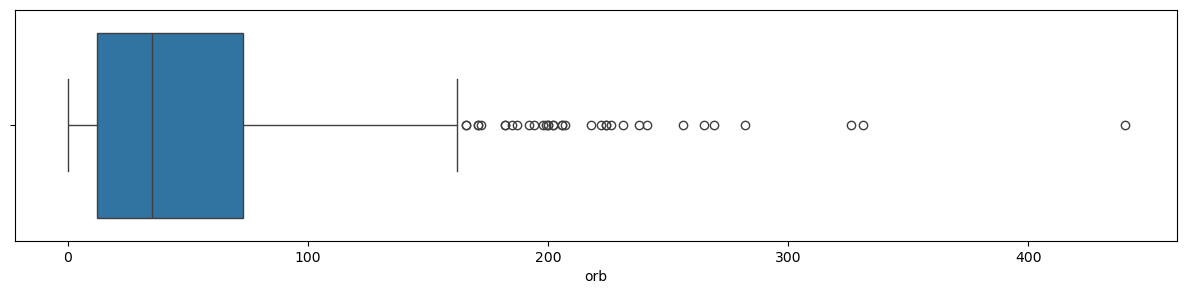


-------------------------- drb --------------------------------


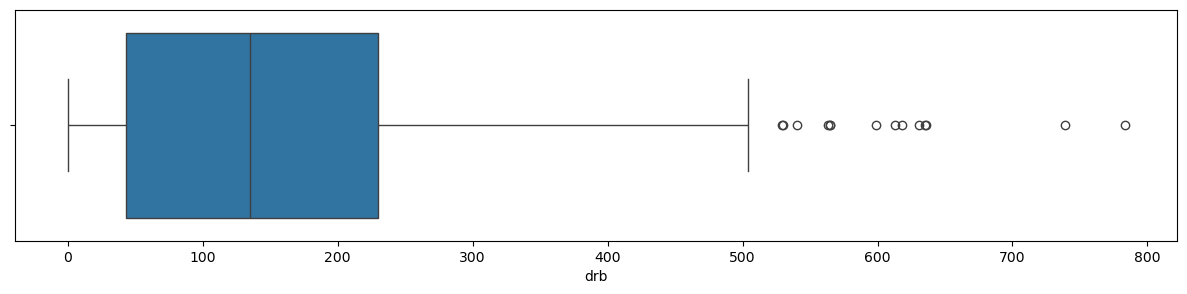


-------------------------- trb --------------------------------


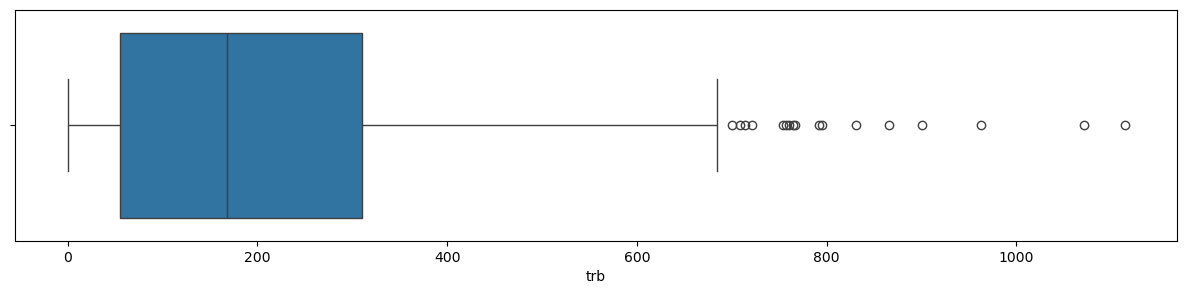


-------------------------- ast --------------------------------


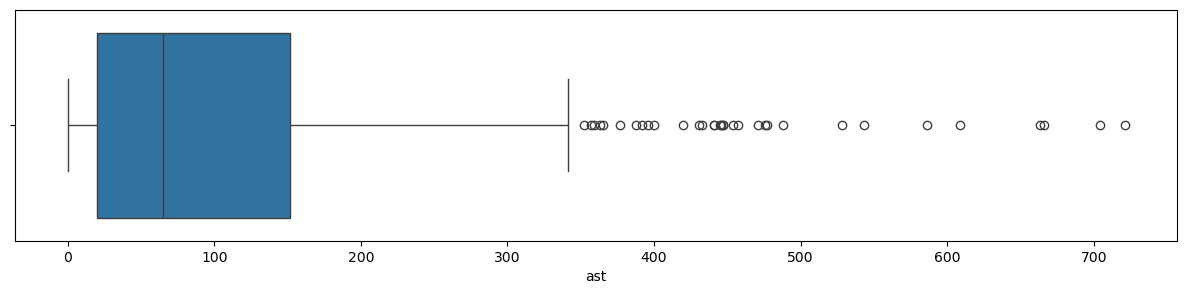


-------------------------- stl --------------------------------


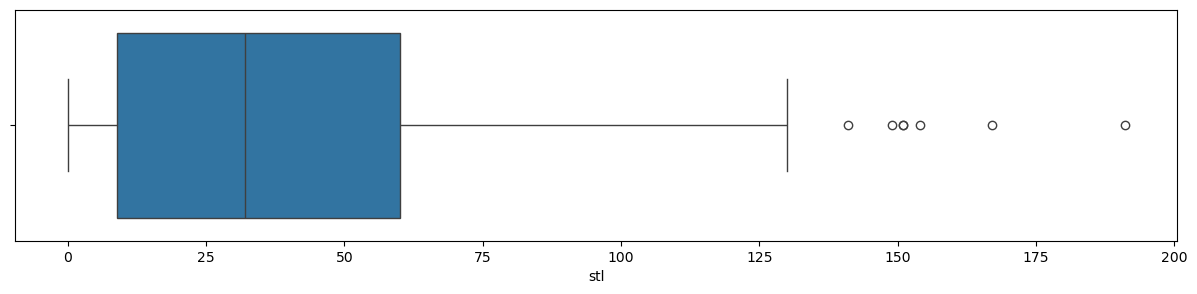


-------------------------- blk --------------------------------


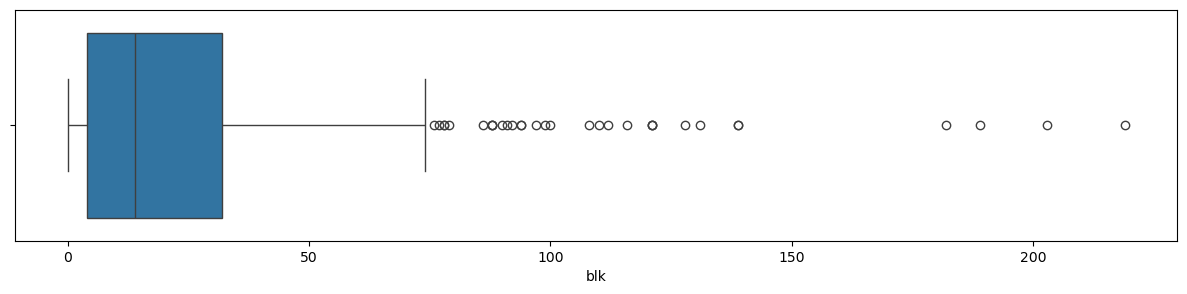


-------------------------- tov --------------------------------


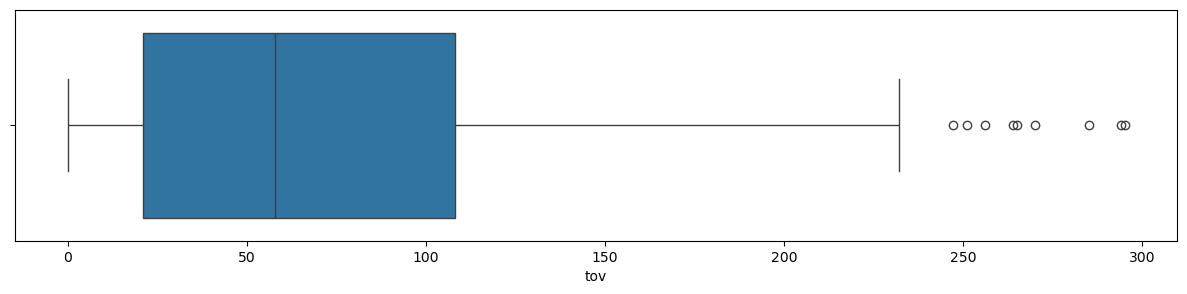


-------------------------- pf --------------------------------


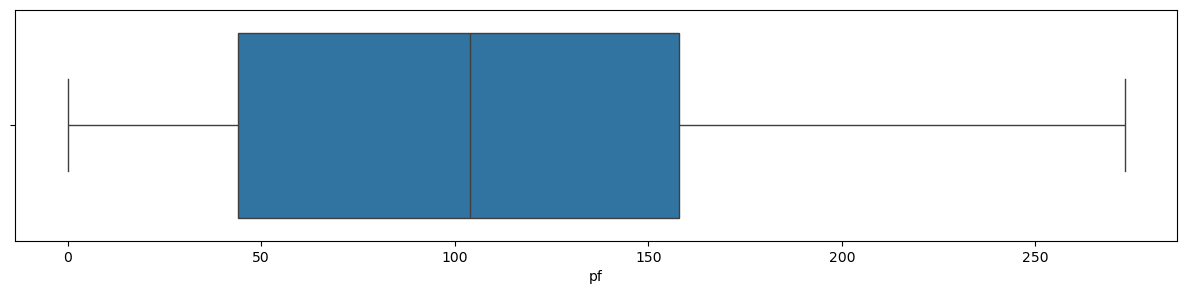


-------------------------- pts --------------------------------


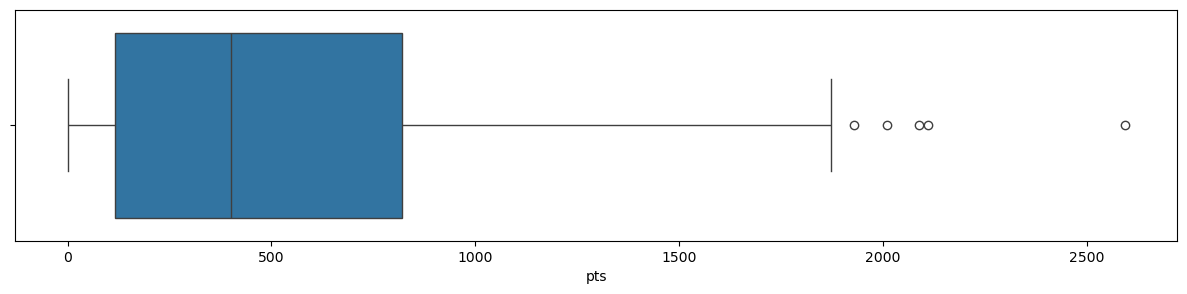

In [106]:
for col in inputs.select_dtypes(include=['int64', 'float64']).columns:
    print(f'-------------------------- {col} --------------------------------')
    plt.figure(figsize=(15,3))
    sbn.boxplot(inputs[col], orient='h')
    plt.show()
    print()

print(f'-------------------------- pts --------------------------------')
plt.figure(figsize=(15,3))
sbn.boxplot(output, orient='h');

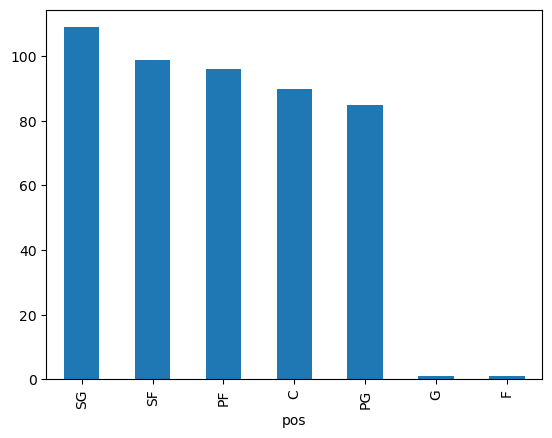

In [107]:
inputs['pos'].value_counts().plot.bar();

## There are many variables have ouliers => use RobustScaler

In [108]:
inputs_encode = pd.get_dummies(inputs, drop_first=True).astype(int)

from sklearn.preprocessing import RobustScaler
robust_scale = RobustScaler()


nba_scaled = robust_scale.fit_transform(pd.concat([inputs_encode, output], axis=1))
nba_scaled = pd.DataFrame(nba_scaled, columns = pd.concat([inputs_encode, output], axis=1).columns)

inputs_scaled = nba_scaled.drop('pts', axis = 1)
output_scaled = nba_scaled['pts']

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, output_scaled, random_state=1, test_size=0.2)

lr_multi = LinearRegression().fit(x_train, y_train)

y_pred_test = lr_multi.predict(x_test)

In [147]:
print(f'Accuracy score (R^2) of Multi LR on train set: {lr_multi.score(x_train, y_train)}')
print(f'Accuracy score (R^2) of Multi LR on test set: {lr_multi.score(x_test, y_test)}')
print()
print(f'MSE of Multi LR on test set: {mean_squared_error(y_test, y_pred_test)}')

Accuracy score (R^2) of Multi LR on train set: 1.0
Accuracy score (R^2) of Multi LR on test set: 1.0

MSE of Multi LR on test set: 1.7344668826230367e-30


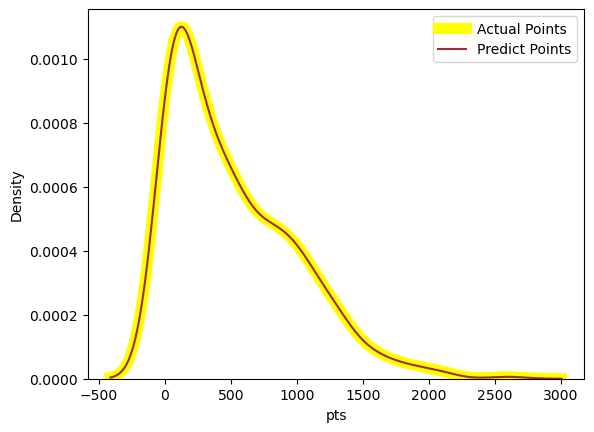

In [111]:
y_pred_descaled  = robust_scale.inverse_transform(np.c_[np.zeros(inputs_scaled.shape), lr_multi.predict(inputs_scaled)])
#The data used to fit RobustScaler() has the shape = 481x32
#inputs_scaled.shape = 481x31
#lr_multi.predict(inputs_scaled).shape = 481x1
#So, use np.c_[np.zeros(inputs_scaled.shape), lr_multi.predict(inputs_scaled)] to create an array shape 481x32
#So that we can apply RobustScaler().inverse_transform()

#Since the predicted descaled outputs lie in the last columns => use  y_pred_descaled[:,-1] to access them

sbn.distplot(output, color='yellow', label='Actual Points', hist=False, kde_kws={'linewidth': 8})
sbn.distplot(y_pred_descaled[:,-1], color='brown', label='Predict Points', hist=False)
plt.legend()
plt.show()

#Displot of Predict and Actual fit perfectly

## Save model

In [112]:
import joblib
joblib.dump(lr_multi, 'xLR_multi_model_ex2.pkl')

['xLR_multi_model_ex2.pkl']

## <span style='color:yellow'> Build Pipeline

In [137]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [138]:
x_train_pipe, x_test_pipe, y_train_pipe, y_test_pipe = train_test_split(inputs, output, test_size=0.2, random_state=4)

In [163]:
steps = [
    ("Onehot Encode", make_column_transformer( (OneHotEncoder(handle_unknown='ignore'), ['pos']), remainder='passthrough')),
    ("Multi linear model", LinearRegression())
]

pipe_multi_lr = Pipeline(steps)

pipe_multi_lr.fit(x_train_pipe, y_train_pipe)

Pipeline(steps=[('Onehot Encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pos'])])),
                ('Multi linear model', LinearRegression())])

In [164]:
print(f'Accuracy score (R^2) of pipeline Multi LR on train set: {pipe_multi_lr.score(x_train_pipe, y_train_pipe)}')
print(f'Accuracy score (R^2) of pipeline Multi LR on test set: {pipe_multi_lr.score(x_test_pipe, y_test_pipe)}')
print()

y_pred_pipe = pipe_multi_lr.predict(x_test_pipe)
print(f'MSE of Multi LR on test set: {mean_squared_error(y_test_pipe, y_pred_pipe)}')

Accuracy score (R^2) of pipeline Multi LR on train set: 1.0
Accuracy score (R^2) of pipeline Multi LR on test set: 0.9999999999226716

MSE of Multi LR on test set: 1.4542835476090001e-05
